# Introdução

Neste trabalho, temos como objetivo desenvolver um estudo completo sobre métodos de classificação aplicados na previsão do _churn_ - cancelamento de um serviço - por parte de clientes usuários do _ABC Multistate Bank_, a fim de que, após o desenvolvimento do modelo, seja possível prever o cancelamento e realizar as devidas medidas para o aumento na retenção de clientes.


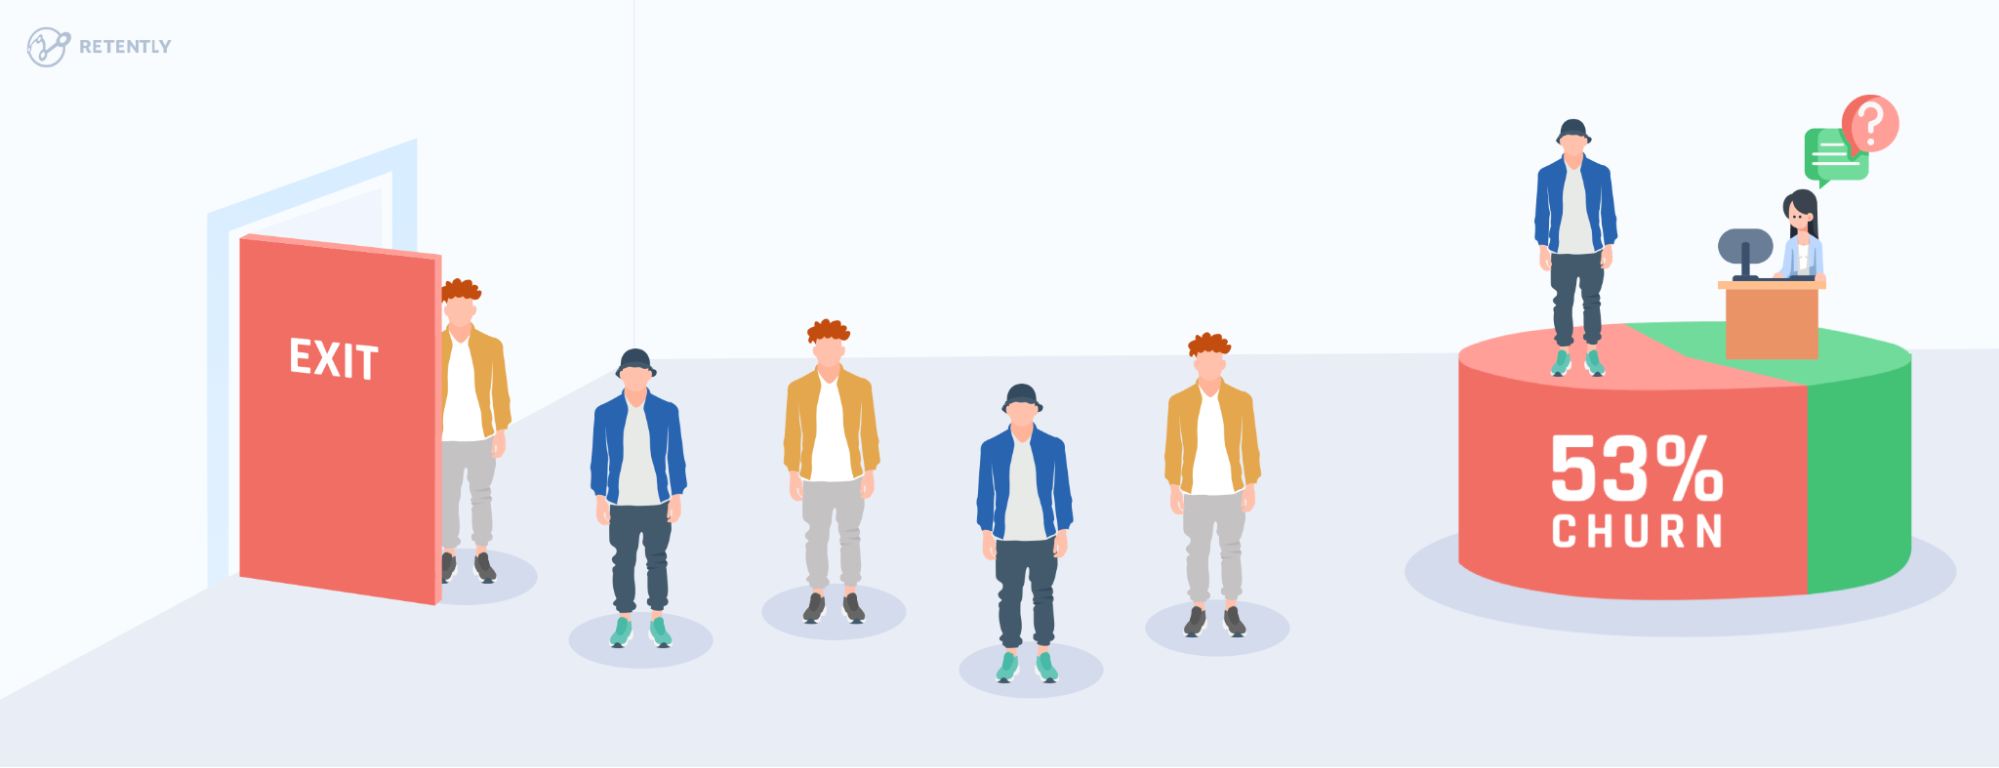

#Analise Exporatória

## Descrição das Variáveis
De início, temos informações sobre 10.000 clientes do _ABC Multistate Bank_, onde também é informado se eles desistiram ou não do serviço ofertado pelo banco. Assim, primeiramente precisamos entender as variáveis que compõem nosso conjunto de dados, a fim de compreender a situação problema.

1. **ID do Cliente**: Número de identificação único para cada cliente;
2. **Score de Crédito**: Pontuação que determina a qualidade de um crédito dado a um cliente;
3. **País**: País de origem do cliente;
4. **Gênero**: Gênero do cliente;
5. **Idade**: Idade do cliente;
6. **Tempo de permanência**: Anos que um cliente tem conta no banco;
7. **Saldo**: Quantidade de dinheiro que o cliente tem na conta;
8. **Número de Produtos**: Número de produtos que o cliente possui naquela conta;
9. **Cartão de Crédito**: Atributo que informa se o cliente tem cartão de crédito ou não;
10. **Atividade**: Atributo que determina se o membro é ativo ou não;
11. **Salário**: Salário total do cliente;
12. **_Churn_**: Perda do cliente por parte do banco.

## Leitura do Dataset

In [ ]:
# Importando as Bibliotecas necessárias

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import drive
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Insira o Bank Customer Churn Prediction.csv na pasta '/content/sample_data/' do Google Colab ou crie uma pasta no Google Drive '/content/drive/MyDrive/AM1/' e adicione o Bank Customer Churn Prediction.csv

try:
  df = pd.read_csv('/content/sample_data/Bank Customer Churn Prediction.csv')
except:
  drive.mount('/content/drive/')
  df = pd.read_csv('/content/drive/MyDrive/AM1/Bank_Churn.csv')
df.rename(columns={"customer_id": "ID",
                   "credit_score": "Score de Crédito",
                   "country": "País",
                   "gender": "Gênero",
                   "age": "Idade",
                   "tenure": "Tempo de permanência",
                   "balance": "Saldo",
                   "products_number": "Número de Produtos",
                   "credit_card": "Cartão de Crédito",
                   "active_member": "Atividade",
                   "estimated_salary": "Salário",
                   "churn": "Churn" }, inplace = True)
df.head(10)

## Informações Iniciais

In [ ]:
# Imprime um resumo conciso do DataFrame
# Este método imprime informações sobre o DataFrame, incluindo o índice dtype e colunas, valores não nulos e uso de memória.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10000 non-null  int64  
 1   Score de Crédito      10000 non-null  int64  
 2   País                  10000 non-null  object 
 3   Gênero                10000 non-null  object 
 4   Idade                 10000 non-null  int64  
 5   Tempo de permanência  10000 non-null  int64  
 6   Saldo                 10000 non-null  float64
 7   Número de Produtos    10000 non-null  int64  
 8   Cartão de Crédito     10000 non-null  int64  
 9   Atividade             10000 non-null  int64  
 10  Salário               10000 non-null  float64
 11  Churn                 10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# Irá informar estatísticas descritivas, incluindo aquelas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.

df.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,15690940.6,71936.2,15565701.0,15628528.2,15690738.0,15753233.8,15815690.0
Score de Crédito,10000.0,650.5,96.7,350.0,584.0,652.0,718.0,850.0
Idade,10000.0,38.9,10.5,18.0,32.0,37.0,44.0,92.0
Tempo de permanência,10000.0,5.0,2.9,0.0,3.0,5.0,7.0,10.0
Saldo,10000.0,76485.9,62397.4,0.0,0.0,97198.5,127644.2,250898.1
Número de Produtos,10000.0,1.5,0.6,1.0,1.0,1.0,2.0,4.0
Cartão de Crédito,10000.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
Atividade,10000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
Salário,10000.0,100090.2,57510.5,11.6,51002.1,100193.9,149388.2,199992.5
Churn,10000.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Retorna uma série booleana denotando linhas duplicadas
df.duplicated().sum()

0

## Análise de dados Faltantes

In [ ]:
df.isnull().sum()

ID                      0
Score de Crédito        0
País                    0
Gênero                  0
Idade                   0
Tempo de permanência    0
Saldo                   0
Número de Produtos      0
Cartão de Crédito       0
Atividade               0
Salário                 0
Churn                   0
dtype: int64

## Mudanças no _Dataset_ e Limpeza dos Dados
Nesse conjunto de dados, não existe nenhum valor ausente ou nulo, de forma que, podemos analisá-los com mais exatidão a fim de construir nossos modelos posteriormente.
Porém, ainda iremos precisar tratar os seguintes atributos:
1. **_Churn_**: Transformaremos o atributo de interesse para classificação em booleano, antes inteiro, a fim de melhor representá-lo.
2. **ID**: Como o ID é alocado de maneira arbitrária para cada usuário, tal atributo será inútil para a nossa análise, então pode ser removido. Isso aumentará a acurácia do modelo e reduzirá o tempo de processamento.

In [ ]:
# Transforma o atributo Churn para Booleano

df['Churn']=df['Churn']==1
df.head(10)

,ID,Score de Crédito,País,Gênero,Idade,Tempo de permanência,Saldo,Número de Produtos,Cartão de Crédito,Atividade,Salário,Churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,True
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,True
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,False
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,True
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,False
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,True
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,False
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,False


In [ ]:
# Retirando a coluna ID

df = df.drop('ID', axis='columns')

## Análise de minimos e maximos

In [ ]:
df.min()

Score de Crédito           350
País                    France
Gênero                  Female
Idade                       18
Tempo de permanência         0
Saldo                      0.0
Número de Produtos           1
Cartão de Crédito            0
Atividade                    0
Salário                  11.58
Churn                    False
dtype: object

In [ ]:
df.max()

Score de Crédito              850
País                        Spain
Gênero                       Male
Idade                          92
Tempo de permanência           10
Saldo                   250898.09
Número de Produtos              4
Cartão de Crédito               1
Atividade                       1
Salário                 199992.48
Churn                        True
dtype: object

## BoxPlot
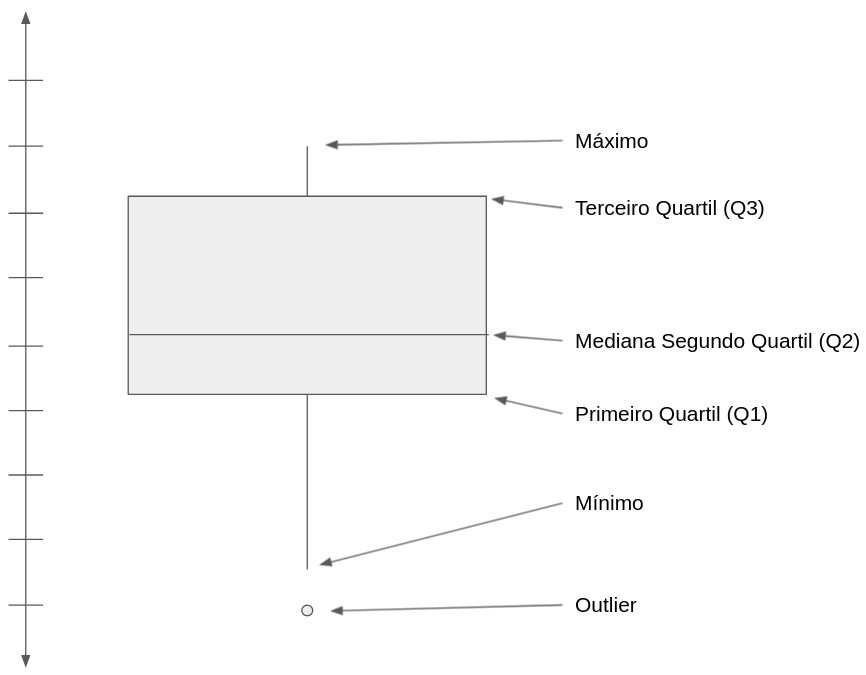

In [ ]:
# Ferramenta gráfica para auxílio da análise estatísticas dos atributos numéricos

n = df.drop(['País','Gênero','Churn','Atividade'],axis = 'columns').columns
m = []
for i in range(0,len(n),4):
  m.append(n[i:i+4])

fig = make_subplots(rows=2, cols=4)
for i in range(2):
  for j in range(4):
    if i==1 and j==3:
      n
    else:
      fig.add_trace(go.Box(y = df[m[i][j]],name = m[i][j], pointpos = 0, boxmean = True),row = i+1,col = j+1)
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'BoxPlot - Dataset',
        x = 0.5,
        font = dict(
            family = 'Arial White',
            size = 25,
            color = 'White'
        )
    ),
    height=1100, width=1300)
fig.show()

## Matriz de Correlação
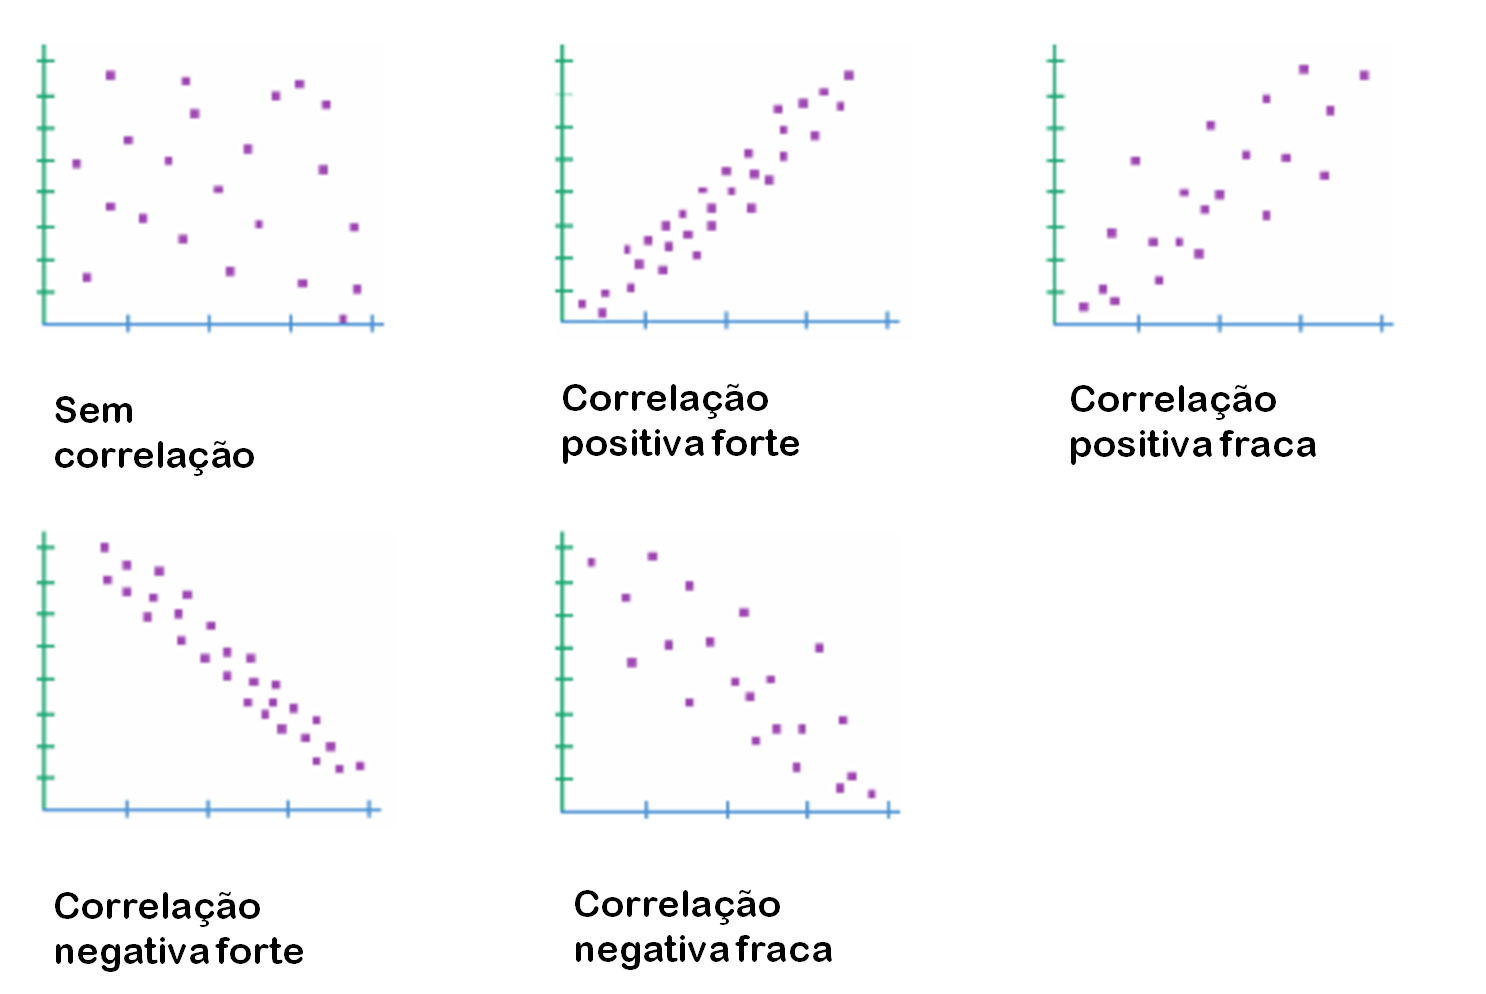

In [ ]:
# Tabela que indica os coeficientes de conexão entre os atributos

df_corr = df.corr().round(2)
df_corr_collumns = df_corr.columns
for i in range(len(df_corr)):
  for j in range(len(df_corr)):
    if i<=j:
      df_corr[df_corr_collumns[i]][df_corr_collumns[j]] = None
fig = px.imshow(df_corr,text_auto=True)
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Matriz de Correlação - Dataset',
        x = 0.5,
        font = dict(
            family = 'Arial White',
            size = 25,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=14,
        color="White"
    ),
    height=800, width=1000
)
fig.show()

<ipython-input-168-306943099828>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Análise dos atributos com a variável de interesse
A seguir, iremos representar graficamente a relação de algumas variáveis com o _Churn_:
1. **Países**
2. **Idade e Saldo**: os dois atributos no nosso _dataset_ com correlação mais expressiva;
3. **Atividade**
4. **Salário e Score de Crédito**
5. **Gênero**

Tal análise será importante para entender o perfil médio das pessoas que dão _churn_.

In [ ]:
# Análise do Churn

fig = px.pie(df, names="Churn")

fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Análise total do Churn',
        x = 0.5,
        font = dict(
            family = 'Arial White',
            size = 30,
            color = 'White'
        )
    ),
    font=dict(
        family="White",
        size=16,
        color="White"
    ))
fig.show()

In [ ]:
# Análise País x Churn

df_pais = df.groupby('País')['Churn'].sum().reset_index()
df_pais

fig = px.scatter_geo(df_pais,locations="País",locationmode='country names',text = 'País',
                     projection="natural earth",size ='Churn',color='País')
fig.update_geos(
    visible=True, resolution=50, scope="europe",
    showcountries=True, countrycolor="White", subunitcolor="Blue"
)
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Mapa dos Países e a Quantidade de Churns',
        x = 0.5,
        font = dict(
            family = 'Arial White',
            size = 30,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)
fig.show()

In [ ]:
# Análise Saldo/Idade x Churn

fig = px.histogram(df, x="Idade", y="Saldo", color="Churn", marginal="box", hover_data=df.columns,color_discrete_sequence = ['#483D8B','#87CEEB'])
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Histograma das duas variaveis mais correlacionadas com Churn',
        x = 0.5,
        font = dict(
            family = 'Arial Black',
            size = 20,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=14,
        color="White"
    )
)
fig.show()

In [ ]:
# Análise Atividade x Churn

fig = px.histogram(df, x='Atividade', color = 'Churn',barmode = 'group',text_auto = True)
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Histograma da Atividade x Churn',
        x = 0.5,
        font = dict(
            family = 'Arial Black',
            size = 25,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=14,
        color="White"
    )
)
fig.show()

In [ ]:
# Análise Salário e Score de Crédito x Churn

fig = px.histogram(df, x="Salário", y="Score de Crédito", color="Churn", marginal="box", hover_data=df.columns,color_discrete_sequence = ['#483D8B','#87CEEB'])
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Histograma do Salário e Score de Crédito x Churn',
        x = 0.5,
        font = dict(
            family = 'Arial Black',
            size = 25,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=14,
        color="White"
    )
)
fig.show()

In [ ]:
# Análise Gênero x Churn

fig = px.histogram(df, x='Gênero', color ='Churn',barmode ='group')
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Histograma do Gênero x Churn',
        x = 0.5,
        font = dict(
            family = 'Arial Black',
            size = 25,
            color = 'white'
        )
    ),
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)
fig.show()

## Conclusões sobre a Análise Exploratória
1. **_Churn_ total da quantidade de clientes analisado** = 20%;
2. **Países**: A França é o país com menor % de _churn_ enquanto a Alemanha é o com a maior porcentagem;
3. **Idade e Saldo**: São as duas variáveis com maior correlação com o _churn_, sendo a primeira **positiva** e a segunda **negativa**;
4. **Atividade**: Clientes ativos do banco dão menos _churn_ do que aqueles inativos
5. **Salário e Score de Crédito**: Ambas as variáveis são semelhantes tanto para cliente que deram _churn_ como para os que não deram
6. **Gênero**: Mulheres dão _churn_ mais que homens.

# Pré-Processamento

In [ ]:
# Visualização do DataFrame

df.head(10)

,Score de Crédito,País,Gênero,Idade,Tempo de permanência,Saldo,Número de Produtos,Cartão de Crédito,Atividade,Salário,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,True
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,True
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,True
6,822,France,Male,50,7,0.00,2,1,1,10062.80,False
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,True
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,False
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,False


## Divisão do Dataset em treinamento e teste

In [ ]:
# Escolha arbitrária da proporção de casos pra treino e teste, sendo 80% para o treino e 20% para os teste

X = df.drop(['Churn'],axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Categórico para Numérico

In [ ]:
X_train = pd.get_dummies(X_train, columns=['País','Gênero'])
X_test = pd.get_dummies(X_test, columns=['País','Gênero'])
X_train

,Score de Crédito,Idade,Tempo de permanência,Saldo,Número de Produtos,Cartão de Crédito,Atividade,Salário,País_France,País_Germany,País_Spain,Gênero_Female,Gênero_Male
9254,686,32,6,0.00,2,1,1,179093.26,1,0,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,0,1,0,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,0,1,0,1
6087,561,27,9,135637.00,1,1,0,153080.40,1,0,0,1,0
6669,517,56,9,142147.32,1,0,0,39488.04,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,1,0,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,1,0,0,1,0
5390,735,38,1,0.00,3,0,0,92220.12,1,0,0,1,0
860,667,43,8,190227.46,1,1,0,97508.04,1,0,0,0,1


## Normalização

In [ ]:
obj_norm = MinMaxScaler().fit(X_train)
X_train = obj_norm.transform(X_train)
obj_norm = MinMaxScaler().fit(X_test)
X_test = obj_norm.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.672,0.189189,0.6,0.000000,0.333333,1.0,1.0,0.895550,1.0,0.0,0.0,0.0,1.0
1,0.564,0.324324,0.4,0.476786,0.333333,1.0,1.0,0.980029,0.0,1.0,0.0,0.0,1.0
2,0.418,0.081081,0.3,0.457317,0.000000,1.0,0.0,0.429261,0.0,0.0,1.0,0.0,1.0
3,0.422,0.121622,0.9,0.540606,0.000000,1.0,0.0,0.765408,1.0,0.0,0.0,1.0,0.0
4,0.334,0.513514,0.9,0.566554,0.000000,0.0,0.0,0.197107,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.836,0.486486,0.8,0.277853,0.000000,1.0,1.0,0.346662,1.0,0.0,0.0,0.0,1.0
7996,0.664,0.540541,0.1,0.000000,0.000000,1.0,1.0,0.003084,1.0,0.0,0.0,1.0,0.0
7997,0.770,0.270270,0.1,0.000000,0.666667,0.0,0.0,0.460925,1.0,0.0,0.0,1.0,0.0
7998,0.634,0.337838,0.8,0.758186,0.000000,1.0,0.0,0.487381,1.0,0.0,0.0,0.0,1.0


In [ ]:
class_weights = {0: 8, 1: 2}
pos_weight = sum(class_weights.values()) / sum(class_weights.keys())
class_weights

{0: 8, 1: 2}

# Regressão Logística


Acurácia: 0.812
Precisão: 0.5648854961832062
Revocação: 0.18829516539440203
Medida-F: 0.282442748091603


[Text(0.5, 1.0, 'Matriz de Confusão - Regressão Logística')]

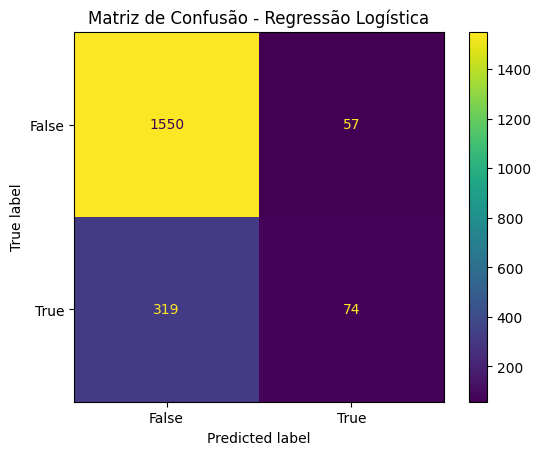

In [ ]:
model_rlog = LogisticRegression(C=0.3, max_iter = 1000)

#Treinamento
model_rlog.fit(X_train, y_train)

#Predição
y_pred_rlog = model_rlog.predict(X_test)

#acurácia
accuracy_rlog = accuracy_score(y_test, y_pred_rlog)
# precisão
precision_rlog = precision_score(y_test, y_pred_rlog)

# revocação
recall_rlog = recall_score(y_test, y_pred_rlog)

# medida-F
f1_rlog = f1_score(y_test, y_pred_rlog)

print('Acurácia:', accuracy_rlog)
print('Precisão:', precision_rlog)
print('Revocação:', recall_rlog)
print('Medida-F:', f1_rlog)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rlog)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model_rlog.classes_)
disp.plot()
disp.ax_.set(title='Matriz de Confusão - Regressão Logística')

In [ ]:
y_prob = model_rlog.predict_proba(X_test)[::,1]

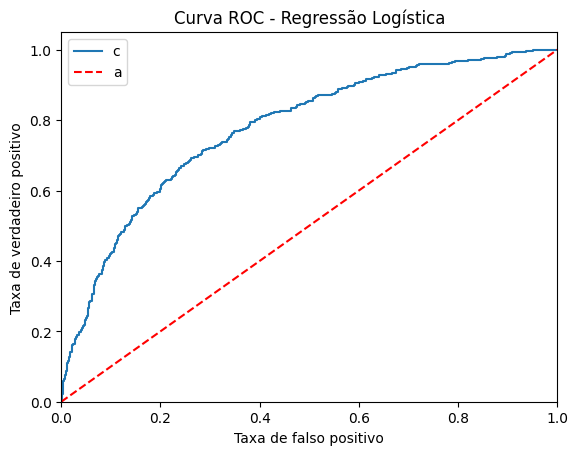

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc1 = roc_auc_score(y_test, y_pred_rlog)
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_prob)
plt.figure ()
plt.plot(fpr1, tpr1, label='Regressão logística (área = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt. xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend("canto inferior direito")
plt.savefig('Log_ROC')
plt.show()

# Naive Bayes

Acurácia: 0.789
Precisão: 0.44223107569721115
Revocação: 0.2824427480916031
Medida-F: 0.34472049689441


[Text(0.5, 1.0, 'Matriz de Confusão - Naive Bayes')]

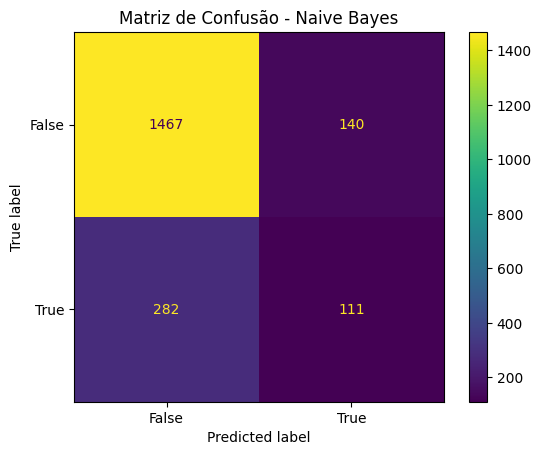

In [ ]:
model_bayes = BernoulliNB(force_alpha=True, alpha=0.1)
model_bayes.fit(X_train, y_train)
y_pred_bayes = model_bayes.predict(X_test)
y_pred_bayes = pd.Series(y_pred_bayes)
accuracy_nb = accuracy_score(y_test, y_pred_bayes)
# precisão
precision_nb = precision_score(y_test, y_pred_bayes)

# revocação
recall_nb = recall_score(y_test, y_pred_bayes)

# medida-F
f1_nb = f1_score(y_test, y_pred_bayes)

print('Acurácia:', accuracy_nb)
print('Precisão:', precision_nb)
print('Revocação:', recall_nb)
print('Medida-F:', f1_nb)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_bayes)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                            display_labels=model_bayes.classes_)
disp.plot()
disp.ax_.set(title = 'Matriz de Confusão - Naive Bayes')

In [ ]:
y_prob_nb = model_bayes.predict_proba(X_test)[::,1]
y_prob_nb

array([0.28581238, 0.02098733, 0.14865656, ..., 0.26460875, 0.11124442,
       0.3167997 ])

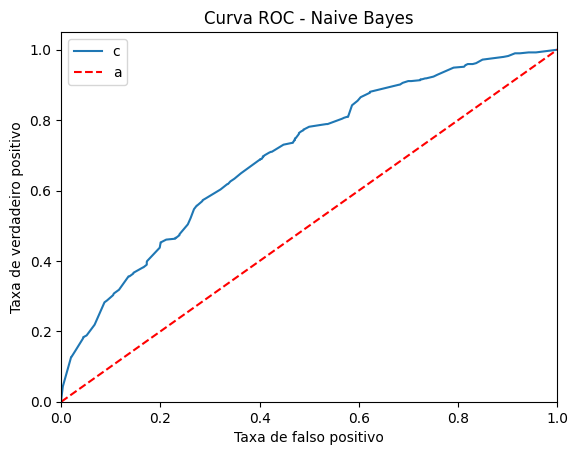

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc2 = roc_auc_score(y_test, y_pred_bayes)
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_prob_nb)
plt.figure ()
plt.plot(fpr2, tpr2, label='Naive Bayes (área = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt. xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC - Naive Bayes')
plt.legend("canto inferior direito")
plt.savefig('Log_ROC')
plt.show()

# XGBoost

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    'objective': 'binary:logistic',  # Definindo o objetivo como classificação binária
    'eta': 0.1,  # Taxa de aprendizado
    'max_depth':3,  # Profundidade máxima da árvore
    'min_child_weight':2,
    'eval_metric': 'error',
    'scale_pos_weight':1.1,
    'scale_pos_weight': pos_weight,
    'class_weight': class_weights
}

In [ ]:
num_rounds = 1000 # Número de iterações de treinamento
model = xgb.train(params, dtrain, num_rounds)
model

[15:41:56] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



In [ ]:
predictions = model.predict(dtest)
predictions_binary = [True if p >= 0.5 else False for p in predictions]

In [ ]:
accuracy_xgb = accuracy_score(y_test, predictions_binary)
# precisão
precision_xgb = precision_score(y_test, predictions_binary)

# revocação
recall_xgb = recall_score(y_test, predictions_binary)

# medida-F
f1_xgb = f1_score(y_test, predictions_binary)

print('Acurácia:', accuracy_xgb)
print('Precisão:', precision_xgb)
print('Revocação:', recall_xgb)
print('Medida-F:', f1_xgb)

[Text(0.5, 1.0, 'Matriz de Confusão - XGBoost')]

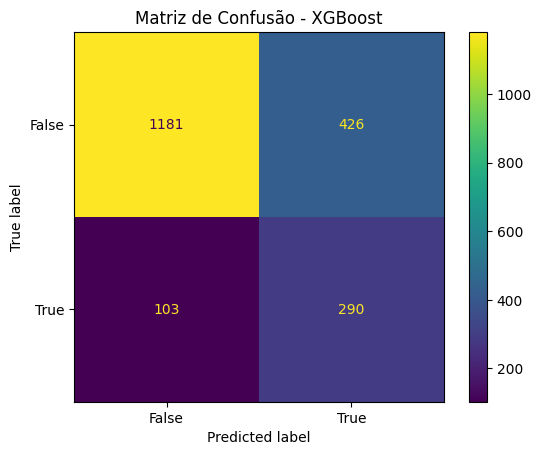

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                            display_labels=model_rlog.classes_)
disp.plot()
disp.ax_.set(title='Matriz de Confusão - XGBoost')

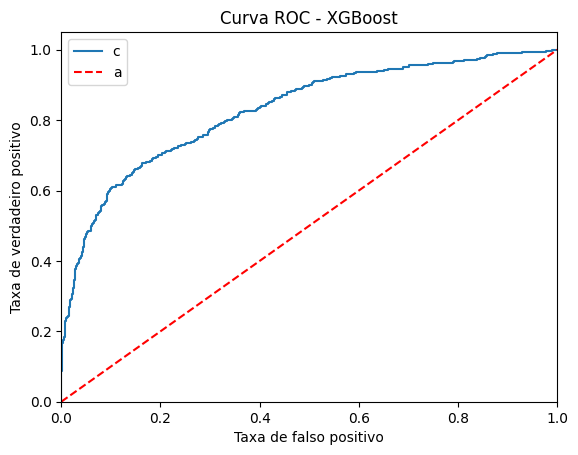

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, predictions_binary)
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plt.figure ()
plt.plot(fpr, tpr, label='XGBoost (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt. xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC - XGBoost')
plt.legend("canto inferior direito")
plt.savefig('xgb_roc.png')
plt.show()

# RandomForest

In [ ]:
rf_classifier = RandomForestClassifier(class_weight = class_weights)

# Ajuste o modelo aos dados de treinamento
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 8, 1: 2})

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
y_prob_rf = rf_classifier.predict_proba(X_test)[::,1]

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# precisão
precision_rf = precision_score(y_test, y_pred_rf)

# revocação
recall_rf = recall_score(y_test, y_pred_rf)

# medida-F
f1_rf = f1_score(y_test, y_pred_rf)

print('Acurácia:', accuracy_rf)
print('Precisão:', precision_rf)
print('Revocação:', recall_rf)
print('Medida-F:', f1_rf)

Acurácia: 0.8625
Precisão: 0.7234848484848485
Revocação: 0.4860050890585242
Medida-F: 0.5814307458143074


[Text(0.5, 1.0, 'Matriz de Confusão - Random Forest')]

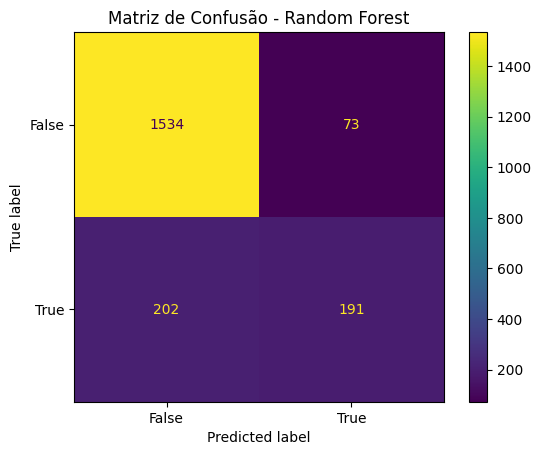

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                            display_labels=model_rlog.classes_)
disp.plot()
disp.ax_.set(title = 'Matriz de Confusão - Random Forest')

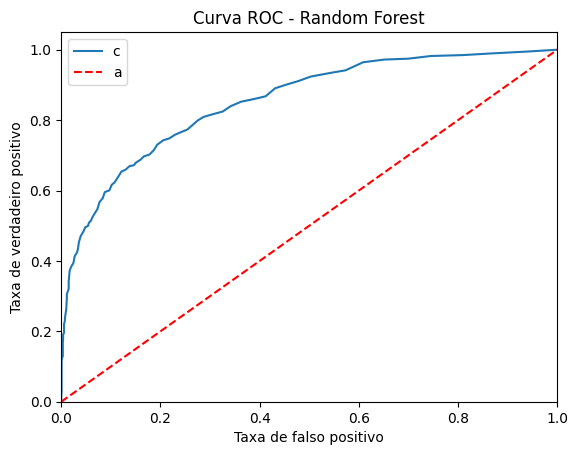

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test,y_prob_rf)
plt.figure ()
plt.plot(fpr, tpr, label='Random Forest (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt. xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC - Random Forest')
plt.legend("canto inferior direito")
plt.savefig('rf_roc.png')
plt.show()

# ADA Boost

In [ ]:
# Crie o classificador AdaBoost
adaboost = AdaBoostClassifier()

# Treine o classificador
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred_ada = adaboost.predict(X_test)

In [ ]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
# precisão
precision_ada = precision_score(y_test, y_pred_ada)

# revocação
recall_ada = recall_score(y_test, y_pred_ada)

# medida-F
f1_ada = f1_score(y_test, y_pred_ada)

print('Acurácia:', accuracy_ada)
print('Precisão:', precision_ada)
print('Revocação:', recall_ada)
print('Medida-F:', f1_ada)

Acurácia: 0.8505
Precisão: 0.6566666666666666
Revocação: 0.5012722646310432
Medida-F: 0.5685425685425686


[Text(0.5, 1.0, 'Matriz de Confusão - ADABoost')]

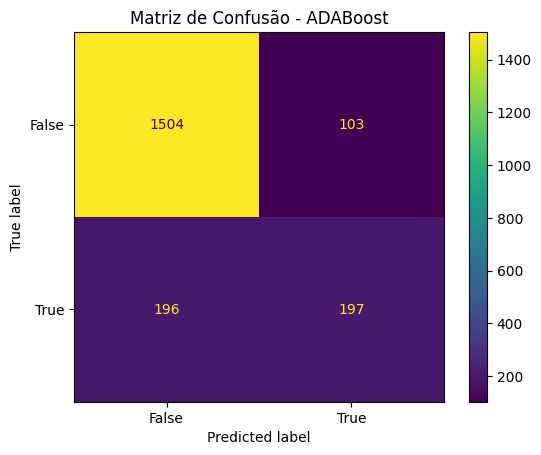

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_ada)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                            display_labels=model_rlog.classes_)
disp.plot()
disp.ax_.set(title = 'Matriz de Confusão - ADABoost')

In [ ]:
y_prob_ada = adaboost.predict_proba(X_test)[::,1]
y_prob_ada

array([0.48730023, 0.48309326, 0.49066031, ..., 0.5038855 , 0.48824023,
       0.4923928 ])

# Avaliação dos Algoritmos

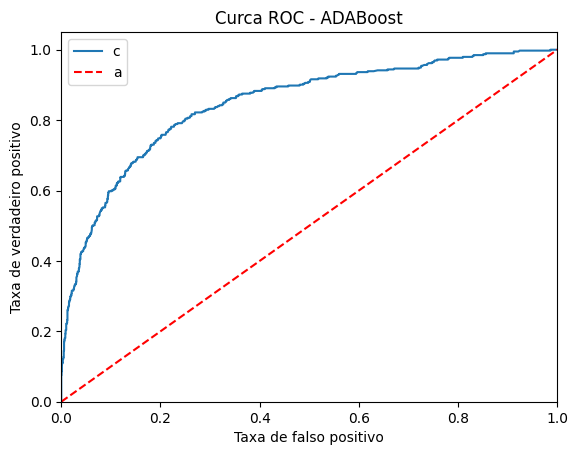

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, y_pred_ada)
fpr, tpr, thresholds = roc_curve(y_test,y_prob_ada)
plt.figure ()
plt.plot(fpr, tpr, label='ADABoost (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt. xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curca ROC - ADABoost')
plt.legend("canto inferior direito")
plt.savefig('ada_roc.png')
plt.show()

In [ ]:
metrics = pd.DataFrame()

metrics['Acurácia'] = [accuracy_rlog,accuracy_nb,accuracy_xgb,accuracy_rf,accuracy_ada]
metrics['Precisão'] = [precision_rlog,precision_nb,precision_xgb,precision_rf,precision_ada]
metrics['Recall'] = [recall_rlog, recall_nb, recall_xgb, recall_rf,recall_ada]
metrics['F1'] = [f1_rlog,f1_nb, f1_xgb, f1_rf, f1_ada]
metrics['Modelo'] = ['Regressão Logística','Naive Bayes','XGBoost','Random Forest','ADABoost']
metrics.set_index('Modelo', inplace = True)
metrics

,Acurácia,Precisão,Recall,F1
Modelo,,,,
Regressão Logística,0.8120,0.564885,0.188295,0.282443
Naive Bayes,0.7890,0.442231,0.282443,0.344720
XGBoost,0.7355,0.405028,0.737913,0.522994
Random Forest,0.8625,0.723485,0.486005,0.581431
ADABoost,0.8505,0.656667,0.501272,0.568543


In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Acurácia',x = metrics.index, y = metrics.Acurácia,text = metrics.Acurácia.round(2)),
    go.Bar(name='Precisão',x = metrics.index, y=metrics.Precisão, text = metrics.Precisão.round(2)),
    go.Bar(name='recall',x = metrics.index, y=metrics.Recall, text = metrics.Recall.round(2)),
    go.Bar(name='f1',x = metrics.index, y=metrics.F1, text = metrics.F1.round(2))
])
# Change the bar mode
fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Métricas por Modelo',
        x = 0.5,
        font = dict(
            family = 'Arial Black',
            size = 30,
            color = 'White'
        )
    ),
    font=dict(
        family="Arial",
        size=16,
        color="White"
    ),barmode='group',
    xaxis_title='Modelos',
    yaxis_title = 'Métricas')
fig.show()




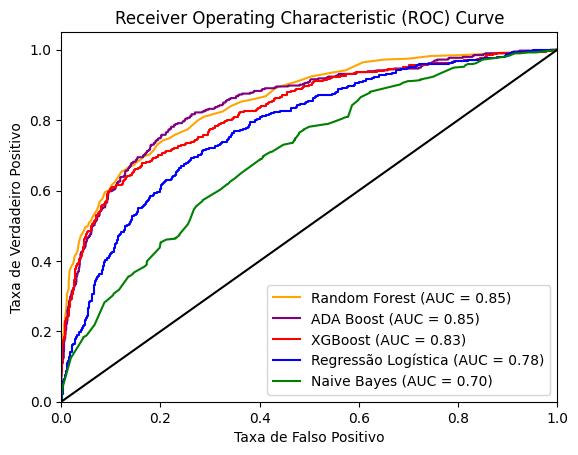

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular as métricas e curvas ROC para cada modelo
logit_roc_auc1 = roc_auc_score(y_test, y_pred_rlog)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob)
auc_model1 = auc(fpr1, tpr1)

logit_roc_auc2 = roc_auc_score(y_test, y_pred_bayes)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob_nb)
auc_model2 = auc(fpr2, tpr2)

logit_roc_auc3 = roc_auc_score(y_test, predictions_binary)
fpr3, tpr3, thresholds3 = roc_curve(y_test, predictions)
auc_model3 = auc(fpr3, tpr3)

logit_roc_auc4 = roc_auc_score(y_test, y_pred_rf)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_prob_rf)
auc_model4 = auc(fpr4, tpr4)

logit_roc_auc5 = roc_auc_score(y_test, y_pred_ada)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_prob_ada)
auc_model5 = auc(fpr5, tpr5)

# Criar uma lista de tuplas contendo o valor do auc_model e o rótulo de cada curva ROC
roc_curves = [(auc_model1, 'Regressão Logística'),
              (auc_model2, 'Naive Bayes'),
              (auc_model3, 'XGBoost'),
              (auc_model4, 'Random Forest'),
              (auc_model5, 'ADA Boost')]

# Classificar a lista em ordem descendente com base no valor do auc_model
roc_curves.sort(reverse=True)

# Plotar as curvas ROC com as legendas organizadas
for auc_model, label in roc_curves:
    if label == 'Regressão Logística':
        plt.plot(fpr1, tpr1, color='blue', label='{} (AUC = {:.2f})'.format(label, auc_model))
    elif label == 'Naive Bayes':
        plt.plot(fpr2, tpr2, color='green', label='{} (AUC = {:.2f})'.format(label, auc_model))
    elif label == 'XGBoost':
        plt.plot(fpr3, tpr3, color='red', label='{} (AUC = {:.2f})'.format(label, auc_model))
    elif label == 'Random Forest':
        plt.plot(fpr4, tpr4, color='orange', label='{} (AUC = {:.2f})'.format(label, auc_model))
    elif label == 'ADA Boost':
        plt.plot(fpr5, tpr5, color='purple', label='{} (AUC = {:.2f})'.format(label, auc_model))

# Configurar linha de referência e limites dos eixos
plt.plot([0, 1], [0, 1], color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Configurar rótulos e título
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Adicionar a legenda
plt.legend(loc='lower right')

# Exibir o gráfico
plt.show()


# Estratégias

A utilização do previsor de churn é uma estratégia para prever clientes que podem dar churn, de modo a identificá-los e realizar tentativas de reter-los. Contudo, pode ser feito estratégias que evitam e previnam o cliente dar churn, como:

-  melhora do serviço
-  atendimento personalizado
-  coleta de feedbacks

## Oferecer Decontos nos Serviços

Caso, o cliente seja previsto como sendo passível de CHURN, é oferecido descontos substanciais.

## Entendimento do seu problema

Tentativa de contato com o cliente (email, ligação, SMS) para entender os problemas que ele está tendo com o serviço e solucionar tais atos. Isso deve ser feito da forma mais humana possível, para que o cliente entenda que é importante para a empresa.

## Reforçar os beneficios

Reforçar para o cliente os beneficios que o serviço trás.

## Melhora da experiência

Melhorar a experiência do cliente com o serviço, isso pode ser feito segmentando os clientes de perfis que podem se adequar melhor a determinados serviços